In [46]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px

In [47]:
# Cargar el dataset
df = pd.read_csv(r'/Users/patriciajaquez/Documents/Documents - Patricia’s MacBook Pro/GitHub/Analisis-de-inversion-inmobiliario/malaga.csv')

In [48]:
# Mostrar columna de datos
df.columns 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [49]:
# Mostrar el dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,96033,"Bonito piso a 200m de la playa, El Palo (Málaga)",510467,Rafael,NaN,Este,36.720310,-4.356270,Entire home/apt,54.0,3,250,2025-03-01,1.79,1,259,39,VUT/MA/22043
1,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.720310,-4.361080,Private room,22.0,5,101,2025-02-11,0.61,5,301,4,NaN
2,330760,Malaga Lodge Guesthouse Double room-shared bath.,1687526,Mayte,NaN,Centro,36.729786,-4.413462,Private room,51.0,1,60,2025-02-23,0.38,6,218,5,VFT/MA/12240
3,340024,NEW APARTMENT IN MALAGA CENTER,1725690,Carlos,NaN,Centro,36.728130,-4.414220,Entire home/apt,65.0,3,301,2025-03-14,2.05,1,215,42,VFT/MA/02334
4,358541,Casa La Maga - Apartment for happy people,1526932,Cristina,NaN,Centro,36.723740,-4.421300,Entire home/apt,86.0,2,388,2025-03-07,2.47,1,100,22,VFT/MA/02288


In [50]:
# Mostrar info del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9621 non-null   int64  
 1   name                            9621 non-null   object 
 2   host_id                         9621 non-null   int64  
 3   host_name                       9621 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9621 non-null   object 
 6   latitude                        9621 non-null   float64
 7   longitude                       9621 non-null   float64
 8   room_type                       9621 non-null   object 
 9   price                           8711 non-null   float64
 10  minimum_nights                  9621 non-null   int64  
 11  number_of_reviews               9621 non-null   int64  
 12  last_review                     84

In [51]:
# Corregir tipos de datos, 'last_review' de object a datetime Dtype
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d', errors='coerce')
# Mostrar info del dataset corregido
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9621 entries, 0 to 9620
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              9621 non-null   int64         
 1   name                            9621 non-null   object        
 2   host_id                         9621 non-null   int64         
 3   host_name                       9621 non-null   object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   9621 non-null   object        
 6   latitude                        9621 non-null   float64       
 7   longitude                       9621 non-null   float64       
 8   room_type                       9621 non-null   object        
 9   price                           8711 non-null   float64       
 10  minimum_nights                  9621 non-null   int64         
 11  numb

In [52]:
# Mostrar estadisticas descriptivas del dataset
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.621000e+03,9.621000e+03,0.0,9621.000000,9621.000000,8711.000000,9621.000000,9621.000000,8454,8454.000000,9621.000000,9621.000000,9621.000000
mean,6.352695e+17,2.173691e+08,NaN,36.720323,-4.421476,244.892320,3.412743,46.334061,2024-10-16 05:45:56.848828928,1.402359,24.359526,162.154142,12.739840
min,9.603300e+04,4.555300e+04,NaN,36.646012,-4.582370,15.000000,1.000000,0.000000,2013-12-31 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,4.222275e+07,4.842949e+07,NaN,36.718342,-4.429060,70.000000,1.000000,3.000000,2024-09-14 00:00:00,0.350000,2.000000,36.000000,1.000000
50%,7.731022e+17,1.420223e+08,NaN,36.722330,-4.422676,96.000000,2.000000,15.000000,2025-02-11 00:00:00,0.910000,5.000000,164.000000,5.000000
75%,1.131138e+18,3.821465e+08,NaN,36.725450,-4.417670,135.000000,3.000000,53.000000,2025-03-14 00:00:00,2.000000,28.000000,272.000000,18.000000
max,1.386258e+18,6.860863e+08,NaN,36.881336,-4.278520,92150.000000,500.000000,1027.000000,2025-03-31 00:00:00,24.940000,218.000000,365.000000,174.000000
std,5.262896e+17,1.946497e+08,NaN,0.013373,0.024403,1424.502555,12.882824,79.124776,NaN,1.479701,41.498793,123.696936,17.853952


In [53]:
# Comprobación de duplicados
df.duplicated().sum()

np.int64(0)

In [54]:
# Comprobación de valores nulos
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               9621
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              910
minimum_nights                       0
number_of_reviews                    0
last_review                       1167
reviews_per_month                 1167
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                            141
dtype: int64

In [55]:
# Porcentaje de valores nulos
df.isnull().mean() * 100

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.000000
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               9.458476
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        12.129716
reviews_per_month                  12.129716
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                             1.465544
dtype: float64

<Axes: >

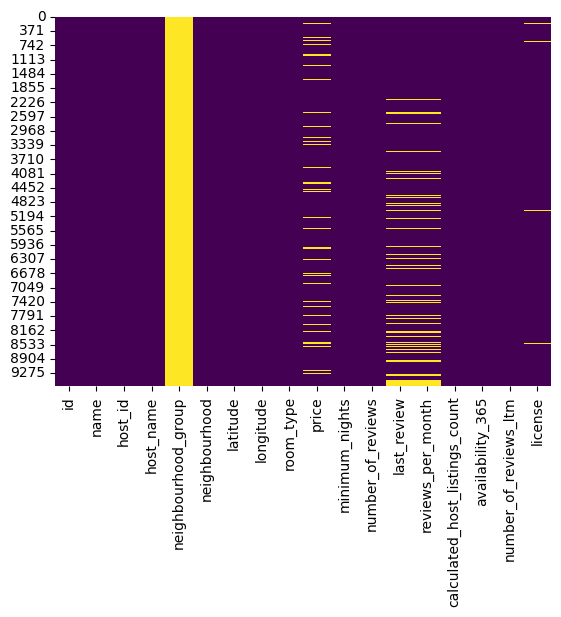

In [56]:
# Visualización de los datos nulos
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


In [57]:
# Eliminar columna vacía innecesaria 'neighbourhood_group'
df.drop(columns=['neighbourhood_group'], inplace=True)

In [58]:
# Mostrar suma de filas con 'number_of_reviews' igual a 0 y 'last_review' nulo
df[(df['number_of_reviews'] == 0) & (df['last_review'].isnull())].shape[0]

1167

In [63]:
# Confirmar 'last review' esta en un formato consistente YYYY-MM-DD, sin fechas incorrectas, sin sentido por ej '2023-02-30'
from datetime import datetime

# 1. Convertir a datetime, forzando errores a NaT (detecta fechas imposibles como '2023-02-30')
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d', errors='coerce')

# 2. Eliminar o marcar fechas futuras
hoy = pd.Timestamp(datetime.today().date())
df.loc[df['last_review'] > hoy, 'last_review'] = pd.NaT

# 3. Verificar cuántas fechas no válidas hay
print("Fechas no válidas o futuras:", df['last_review'].isna().sum())

Fechas no válidas o futuras: 1167


In [62]:
# Contar fechas no válidas o vacías en 'last_review'
errores = df['last_review'].isna().sum()
print(f"Fechas no válidas o vacías: {errores}")

# Mostrar los años únicos en la columna 'last_review' en orden ascendente
print("Años únicos en 'last_review':")
anios = sorted(df['last_review'].dt.year.dropna().astype(int).unique())
print(list(map(int, anios)))

Fechas no válidas o vacías: 1167
Años únicos en 'last_review':
[2013, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [61]:
# Fix 'last_review' para filas con 'number_of_reviews' igual a 0, establecerlo a '0000-00-00'